In [1]:
import pandas as pd
import pickle
import numpy as np

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import pearsonr

In [2]:
# # Import the different sheets.

# yrs = ["2019", "2020"]
# df = pd.DataFrame()

# for sheet in yrs:
#     temp_df = pd.read_excel("../data/2019 - 2020 JCRP Metrics -EB.xlsx", 
#                    sheet_name = sheet)
#     df = pd.concat([df, temp_df])
    
# df = df.dropna(axis=0, how="all")

# # A lot of the Title entries are "Selected Abstracts..." and are from "Literature Update" article types.
# # However, the Vol 40 doesn't have article type so have to look through titles.

# df = df[df["Title"].str.contains("Selected Abstracts From Recent Publications") == False]

In [3]:
with open("../data/dataframe_with_abstracts.pickle", "rb") as read_file:
    df = pickle.load(read_file)
    

### Sentiment Analysis.

In [4]:
# Calculate Sentiment score.

analyzer = SentimentIntensityAnalyzer()
df['title_score'] = df.Title.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))

df['abstract_score'] = df.Full_Abstract.map(analyzer.polarity_scores).map(lambda x: x.get('compound'))

## Compare Title and Abstract Sentiment.

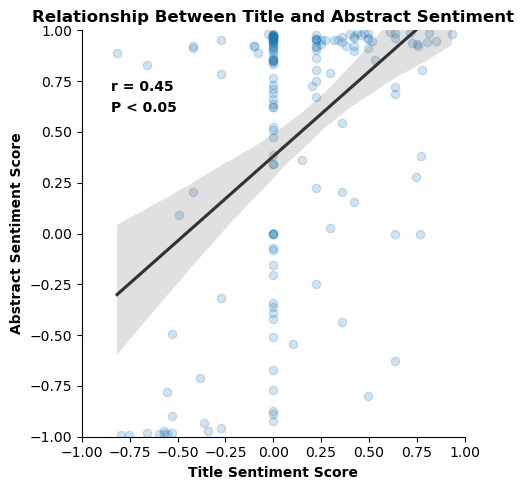

In [13]:
df_fig = df.dropna(subset=["title_score", "abstract_score"])
corr, p = pearsonr(df_fig["title_score"], df_fig["abstract_score"])


sns.lmplot(x="title_score",
           y="abstract_score",
           data=df_fig,
           palette="C7",
           scatter_kws={'alpha':0.2}, 
           line_kws={"color": "0.2"})

plt.text(-0.85, 0.7, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"= {p:.2f}"
plt.text(-0.85, 0.6, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title("Relationship Between Title and Abstract Sentiment", weight="bold")
plt.ylabel('Abstract Sentiment Score', weight="bold")
plt.xlabel('Title Sentiment Score', weight="bold")
plt.xlim(-1,1)
plt.ylim(-1,1)

plt.tight_layout() 
plt.show()

# plt.savefig("../images/title_sentiment_vs_tweets")

In [6]:
print(f"Mean of title sentiment score: {np.mean(df.title_score):.3f}")
print(f"Mean of abstract sentiment score: {np.mean(df.abstract_score):.3f}")


Mean of title sentiment score: 0.105
Mean of abstract sentiment score: 0.467


### Sentiment Graphing for TITLES.

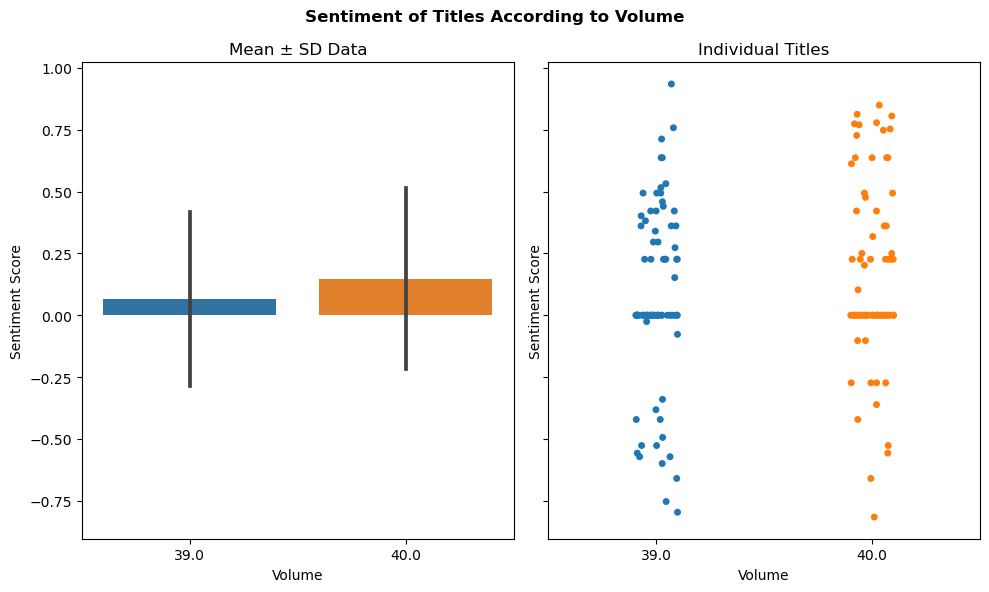

In [7]:
fig, ax = plt.subplots(1,2, sharey=True, figsize = (10,6))
fig.suptitle("Sentiment of Titles According to Volume",weight='bold')

sns.barplot(ax=ax[0],
            x="Volume",
            y="title_score",
            data=df,
            ci="sd")
ax[0].set_title('Mean ± SD Data')
ax[0].set_ylabel('Sentiment Score')

sns.stripplot(ax=ax[1],
              x="Volume",
              y="title_score",
              data=df)
ax[1].set_title('Individual Titles')
ax[1].set_ylabel('Sentiment Score')

plt.tight_layout() 
plt.show()
# plt.savefig("../images/title_sentiment_vs_volume")

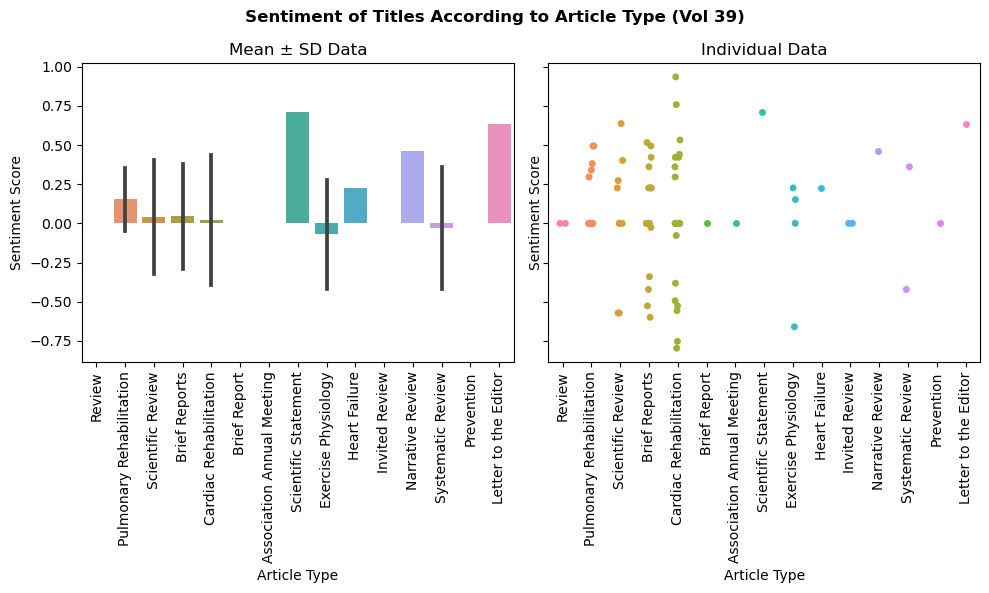

In [8]:
# No article types provided for Volume 40.

fig, ax = plt.subplots(1,2, sharey=True, figsize = (10,6))
fig.suptitle("Sentiment of Titles According to Article Type (Vol 39)",weight='bold')

sns.barplot(ax=ax[0],
            x="Article Type",
            y="title_score",
            data=df,
#             data=df.groupby("Article Type").filter(lambda x: len(x) > 2),
            ci="sd")
ax[0].set_title('Mean ± SD Data')
ax[0].set_ylabel('Sentiment Score')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


sns.stripplot(ax=ax[1],
              x="Article Type",
              y="title_score",
              data=df)
ax[1].set_title('Individual Data')
ax[1].set_ylabel('Sentiment Score')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)

plt.tight_layout() 
plt.show()
# plt.savefig("../images/title_sentiment_vs_type")

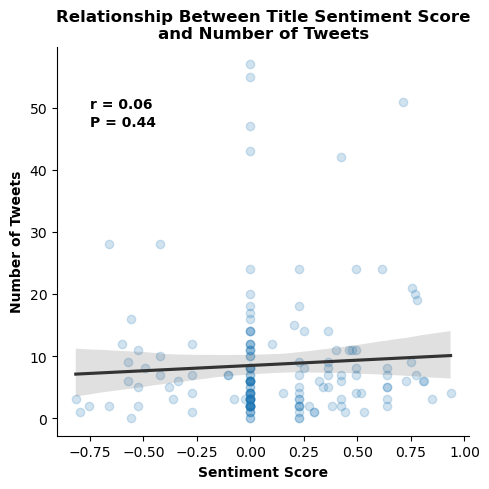

In [9]:
df_fig = df.dropna(subset=["title_score", "Tweets"])
corr, p = pearsonr(df_fig["title_score"], df_fig["Tweets"])


sns.lmplot(x="title_score",
           y="Tweets",
           data=df_fig,
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})

plt.text(-0.75, 50, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"= {p:.2f}"
plt.text(-0.75, 47, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title("Relationship Between Title Sentiment Score\nand Number of Tweets", weight="bold")
plt.ylabel('Number of Tweets', weight="bold")
plt.xlabel('Sentiment Score', weight="bold")

plt.tight_layout() 
plt.show()

# plt.savefig("../images/title_sentiment_vs_tweets")

### Sentiment Graphing for ABSTRACTS.

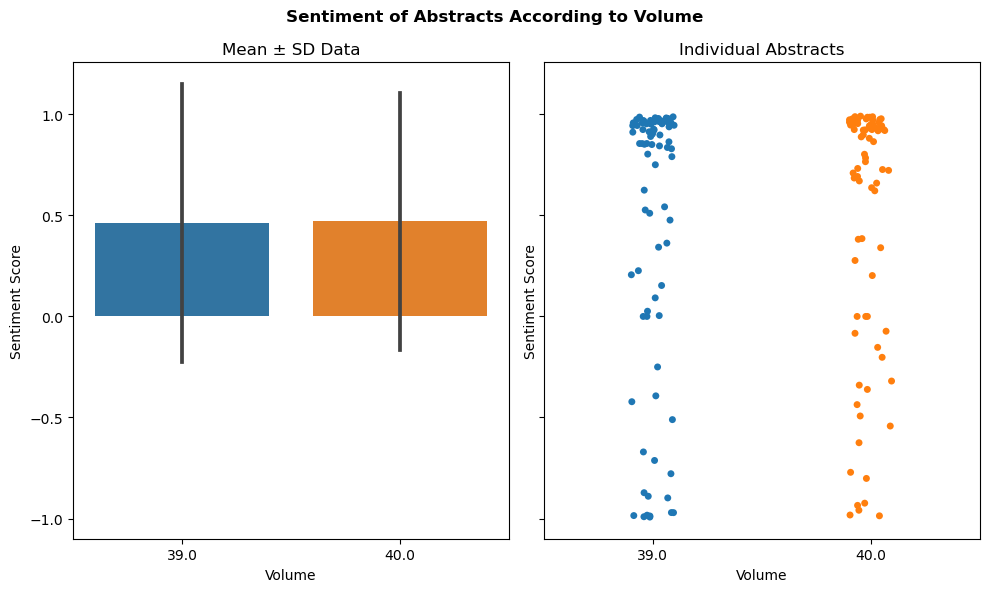

In [10]:
fig, ax = plt.subplots(1,2, sharey=True, figsize = (10,6))
fig.suptitle("Sentiment of Abstracts According to Volume",weight='bold')

sns.barplot(ax=ax[0],
            x="Volume",
            y="abstract_score",
            data=df,
            ci="sd")
ax[0].set_title('Mean ± SD Data')
ax[0].set_ylabel('Sentiment Score')

sns.stripplot(ax=ax[1],
              x="Volume",
              y="abstract_score",
              data=df)
ax[1].set_title('Individual Abstracts')
ax[1].set_ylabel('Sentiment Score')

plt.tight_layout() 
plt.show()
# plt.savefig("../images/abstract_sentiment_vs_volume")

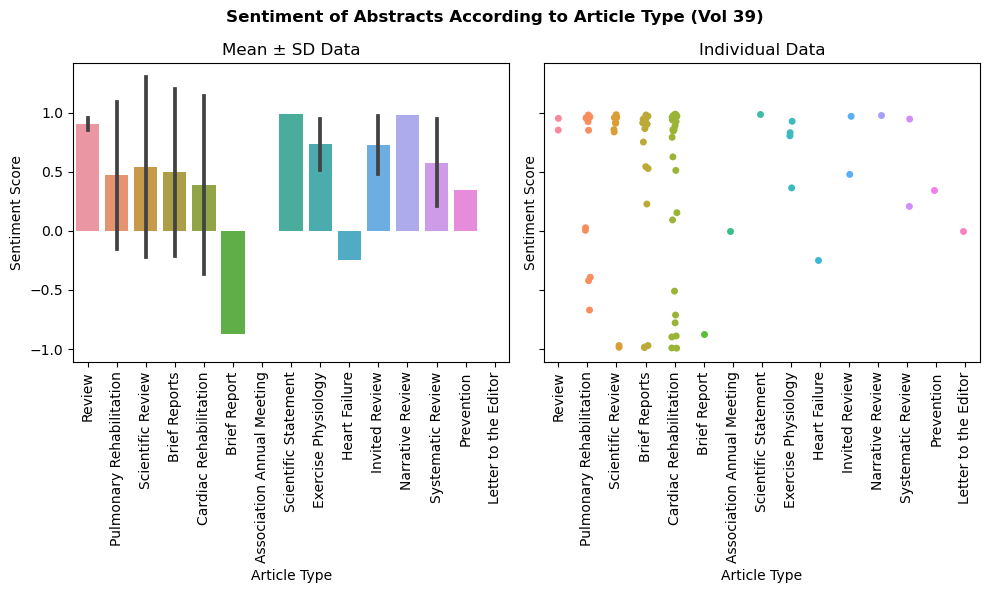

In [11]:
# No article types provided for Volume 40.

fig, ax = plt.subplots(1,2, sharey=True, figsize = (10,6))
fig.suptitle("Sentiment of Abstracts According to Article Type (Vol 39)",weight='bold')

sns.barplot(ax=ax[0],
            x="Article Type",
            y="abstract_score",
            data=df,
#             data=df.groupby("Article Type").filter(lambda x: len(x) > 2),
            ci="sd")
ax[0].set_title('Mean ± SD Data')
ax[0].set_ylabel('Sentiment Score')
ax[0].set_xticklabels(ax[0].get_xticklabels(),rotation = 90)


sns.stripplot(ax=ax[1],
              x="Article Type",
              y="abstract_score",
              data=df)
ax[1].set_title('Individual Data')
ax[1].set_ylabel('Sentiment Score')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 90)

plt.tight_layout() 
plt.show()
# plt.savefig("../images/abstract_sentiment_vs_type")

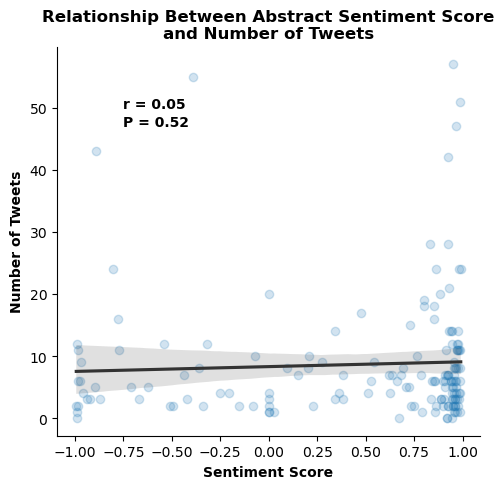

In [12]:
df_fig = df.dropna(subset=["abstract_score", "Tweets"])
corr, p = pearsonr(df_fig["abstract_score"], df_fig["Tweets"])


sns.lmplot(x="abstract_score",
           y="Tweets",
           data=df_fig,
            scatter_kws={'alpha':0.2}, 
            line_kws={"color": "0.2"})

plt.text(-0.75, 50, f"r = {corr:.2f}", horizontalalignment='left', size='medium', color='black', weight='semibold')
p_val = "< 0.05" if p < 0.05 else f"= {p:.2f}"
plt.text(-0.75, 47, f"P {p_val}", horizontalalignment='left', size='medium', color='black', weight='semibold')
plt.title("Relationship Between Abstract Sentiment Score\nand Number of Tweets", weight="bold")
plt.ylabel('Number of Tweets', weight="bold")
plt.xlabel('Sentiment Score', weight="bold")

plt.tight_layout() 
plt.show()

# plt.savefig("../images/abstract_sentiment_vs_tweets")